# Data Cleaning Notebook

Welcome to the Data Cleaning Notebook. This notebook is dedicated to cleaning the movies dataset to ensure that it's well-suited for Exploratory Data Analysis (EDA) and modeling. 

## Objectives:
- **Identifying Missing Values**: Detecting and handling missing data.
- **Data Type Conversion**: Ensuring each column is of the correct data type.
- **Data Format Conversion**: Format data that is not readable.
- **Identifying Duplicate Columns**: Examining columns that may duplicate information and deciding which ones to keep.
- **Dropping Non-useful Columns**: Removing columns that do not provide useful information for analysis or modeling

## Datasets:

**Movies Dataset**: Contains combined data from OMDB and TMDB APIs, saved in data/movies.parquet.

In [1222]:
import pandas as pd
import numpy as np
from collections import Counter

Let's read movies dataset parquet file and look at its shape and columns.

In [1223]:
df = pd.read_parquet('../data/movies.parquet')
print(df.shape)
print(df.columns)
pd.set_option('display.max_columns', None)
df.head(10)

(8052, 61)
Index(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'Title', 'Year', 'Rated', 'Released',
       'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Language',
       'Country', 'Awards', 'Poster', 'Ratings', 'Metascore', 'imdbRating',
       'imdbVotes', 'imdbID', 'Type', 'DVD', 'BoxOffice', 'Production',
       'Website', 'Response', 'belongs_to_collection.id',
       'belongs_to_collection.name', 'belongs_to_collection.poster_path',
       'belongs_to_collection.backdrop_path', 'totalSeasons', 'Error',
       'Season', 'Episode', 'seriesID', 'cast', 'crew'],
      dtype='object')


,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,belongs_to_collection.id,belongs_to_collection.name,belongs_to_collection.poster_path,belongs_to_collection.backdrop_path,totalSeasons,Error,Season,Episode,seriesID,cast,crew
0,False,/1FrKhMDGMwpry6vDLyRbgLdBSE1.jpg,None,200000,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",,28501,tt0055304,en,The Pit and the Pendulum,"In the sixteenth century, Francis Barnard trav...",9.49,/dSdDtWebN6NwUM3D2bejPRCKcDT.jpg,"[{'id': 4820, 'logo_path': None, 'name': 'Alta...","[{'iso_3166_1': 'US', 'name': 'United States o...",1961-08-12,2000000,81,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Betrayal cuts both ways!,The Pit and the Pendulum,False,6.83,288,The Pit and the Pendulum,1961,Not Rated,23 Aug 1961,80 min,"Drama, Horror, Mystery",Roger Corman,"Richard Matheson, Edgar Allan Poe","Vincent Price, Barbara Steele, John Kerr","In the sixteenth century, Francis Barnard trav...",English,United States,N/A,https://m.media-amazon.com/images/M/MV5BZGY1OD...,"[{'Source': 'Internet Movie Database', 'Value'...",78,7.0,"15,801",tt0055304,movie,16 Sep 2008,N/A,N/A,N/A,True,NaN,None,None,None,None,None,None,None,None,"[{'adult': False, 'cast_id': 13, 'character': ...","[{'adult': False, 'credit_id': '52fe459cc3a368..."
1,False,/ffRq48IlOKcAMeM7rGpJRPzRsSh.jpg,None,14000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",,28510,tt1288403,en,Universal Soldier: Regeneration,When terrorists threaten nuclear catastrophe a...,15.84,/hYLzRwCcCyTVKGBRAiHEW7NOEni.jpg,"[{'id': 21897, 'logo_path': None, 'name': 'For...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-10-01,875386,97,"[{'english_name': 'Bulgarian', 'iso_639_1': 'b...",Released,Reanimated. Rearmed. The ultimate rematch,Universal Soldier: Regeneration,False,5.60,405,Universal Soldier: Regeneration,2009,R,07 Jan 2010,97 min,"Action, Adventure, Sci-Fi",John Hyams,"Richard Rothstein, Christopher Leitch, Dean De...","Dolph Lundgren, Jean-Claude Van Damme, Andrei ...",Terrorists kidnap the Russian Prime Minister's...,"English, Bulgarian",United States,N/A,https://m.media-amazon.com/images/M/MV5BODAzMD...,"[{'Source': 'Internet Movie Database', 'Value'...",70,5.3,"26,273",tt1288403,movie,16 Apr 2012,N/A,N/A,N/A,True,10713.00,Universal Soldier Collection,/w6VKg5MJFmoACGgLcDUMmNSPYOv.jpg,/dpcjRnOTkbyHWGE0lEmgzz3ACTm.jpg,None,None,None,None,None,"[{'adult': False, 'cast_id': 1, 'character': '...","[{'adult': False, 'credit_id': '5eadf35c0b7316..."
2,False,/56eHAxXfZTz5pGiVDCFnuiHw2fp.jpg,None,2600000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",,28571,tt0041452,en,The Heiress,Dull and plain Catherine lives with her emotio...,6.43,/zcut0Y6PfcjBJKIyOpc0QDFS9jK.jpg,"[{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...","[{'iso_3166_1': 'US', 'name': 'United States o...",1949-10-06,2300000,115,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,A truly great motion picture.,The Heiress,False,7.70,219,The Heiress,1949,Not Rated,28 Dec 1949,115 min,"Drama, Romance",William Wyler,"Ruth Goetz, Augustus Goetz, Henry James","Olivia de Havilland, Montgomery Clift, Ralph R...",A naive young woman falls for a handsome young...,"English, French",United States,Won 4 Oscars. 9 wins & 8 nominations total,https://m.media-amazon.com/images/M/MV5BMjZjNm...,"[{'Source': 'Internet Movie Database', 'Value'...",N/A,8.1,"16,694",tt0041452,movie,N/A,N/A,N/A,N/A,True,NaN,None,None,None,None,None,None,None,None,"[{'adult': False, 'cast_id': 2, 'character': '...","[{'adult': False, 'credit_id': '52fe45a2c3a368..."
3,False,/rGQfN

- The dataset has 8052 rows a variety of columns (61) covering different aspects of movies. These include basic information such as 'title', 'genres', 'release_date', and 'runtime', as well as more detailed fields like 'production_companies', 'production_countries', and 'spoken_languages'. 
- There are also columns derived from other sources or datasets, as indicated by the presence of duplicate or similar information such as 'Title' (and 'title'), 'imdb_id' (and 'imdbID'), 'runtime' (and 'Runtime'). It would be prudent to investigate these columns to confirm if they are redundant and decide whether to keep, merge, or drop them.
- The dataset contains columns related to a movie's online presence like 'homepage', 'poster_path', and 'backdrop_path'.
- Some columns like 'belongs_to_collection.id', 'belongs_to_collection.name', 'belongs_to_collection.poster_path', and 'belongs_to_collection.backdrop_path' indicate that there’s information regarding the collections a movie may belong to. This might be useful for grouping or categorizing movies.
- Columns like 'totalSeasons', 'Season', 'Episode', and 'seriesID' suggest that the dataset may also contain information regarding TV series episodes in addition to movies. However, for the scope of this project which focuses on movie success prediction, only movies are relevant as series represent a completely different category with different factors affecting their success. Therefore, it will be essential to filter out any series-related entries from the dataset during the data cleaning process.
- The dataset comprises several columns (Ratings, imdbRating, popularity, Metascore) related to ratings obtained from different sources. Looking into these ratings can help us get a complete picture of how well a movie is liked on different platforms. Also, seeing how these ratings relate to other things like how much money a movie makes or the awards it gets can be key in guessing how successful a movie will be.
- The 'genres' column tells us what type or types of movie we're looking at - like if it's a comedy, drama, or something else. It's important to think about which genres fit well with our project. For example, documentaries or series might be different from regular movies when it comes to budget, awards, and how they are made. So, we might need to look closely at the genres and maybe leave some of them out to make sure our data is good for helping us guess which movies will do well.
- The columns 'revenue', 'budget', and 'BoxOffice' tell us about the money side of the movies. 
- The 'Error' column may indicate rows where there were issues or errors in data collection or merging. This column should be investigated further to understand its significance and whether any data cleaning is required.
- cast and crew columns give us information about people who participated in movies creation and development

First, let's identify which columns have a mix of null and non-null values, and which columns are completely obviously null, to understand the completeness of our data and decide how to handle missing values moving forward.

In [1224]:
null_columns = df.columns[df.isnull().all()]
print("empty columns:", null_columns)
mixed_null_columns = df.columns[df.isnull().any() & df.notnull().any()]
print("columns with mix of null and non-null values:", mixed_null_columns)
print("dataset info:")
df.info(verbose=True)


empty columns: Index(['belongs_to_collection'], dtype='object')
columns with mix of null and non-null values: Index(['backdrop_path', 'poster_path', 'Title', 'Year', 'Rated', 'Released',
       'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Language',
       'Country', 'Awards', 'Poster', 'Ratings', 'Metascore', 'imdbRating',
       'imdbVotes', 'imdbID', 'Type', 'DVD', 'BoxOffice', 'Production',
       'Website', 'belongs_to_collection.id', 'belongs_to_collection.name',
       'belongs_to_collection.poster_path',
       'belongs_to_collection.backdrop_path', 'totalSeasons', 'Error',
       'Season', 'Episode', 'seriesID', 'cast', 'crew'],
      dtype='object')
dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8052 entries, 0 to 8051
Data columns (total 61 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   adult                                8052 non-null   bool 

As we look through our data, we're making some notes on what to clean up later in this notebook. First, we see some columns have no information at all—just empty spots. We'll get rid of these columns. 

Next, we see some columns have a mix of empty spots and actual information. We'll need to decide what to do with these:
- The columns 'backdrop_path' and 'poster_path' don't seem relevant for our analysis, suggesting their removal.
- There are four columns about movie collections, but we may only need one new column (make it from belongs_to_collection.name) that just says yes or no for whether a movie is part of a collection. This way, we can simplify our data and focus on what's important.


Now, I'll focus on columns that might have duplicate or overlapping information. It's important to check these columns to avoid redundant data in our analysis, which could cause complications later. The columns I'm looking at are:

- 'title' and 'Title'
- 'release_date', 'Year' and 'Released'
- 'runtime' and 'Runtime'
- 'genres' and 'Genre'
- 'original_language', 'spoken_languages' and 'Language'
- 'production_countries' and 'Country'
- 'production_companies' and 'Production'
- 'imdb_id' and 'imdbID'

Let's examine these pairs of columns to understand better how they relate to each other and decide how to handle them in our dataset.


In [1225]:
# Unpack values from the dictionaries to lists for columns for the better usability: 
# genres, production_companies, production_countries and spoken_languages
df['genres'] = df['genres'].apply(lambda x: ','.join([d['name'] for d in x]))
df['production_companies'] = df['production_companies'].apply(lambda x: ','.join([d['name'] for d in x]))
df['production_countries'] = df['production_countries'].apply(lambda x: ','.join([d['iso_3166_1'] for d in x]))
df['spoken_languages'] = df['spoken_languages'].apply(lambda x: ','.join([d['iso_639_1'] for d in x]))

In [1226]:
empty_strings = df['production_companies'].value_counts().get('', 0)
print(f"Number of empty strings in production_companies: {empty_strings}")
empty_strings = df['production_countries'].value_counts().get('', 0)
print(f"Number of empty strings in production_countries: {empty_strings}")
empty_strings = df['spoken_languages'].value_counts().get('', 0)
print(f"Number of empty strings in spoken_languages: {empty_strings}")
empty_strings = df['genres'].value_counts().get('', 0)
print(f"Number of empty strings in genres: {empty_strings}")

Number of empty strings in production_companies: 227
Number of empty strings in production_countries: 119
Number of empty strings in spoken_languages: 38
Number of empty strings in genres: 23


In [1227]:
# Fill missing values with Unknown
df['production_companies'] = df['production_companies'].replace('', 'Unknown')
df['production_countries'] = df['production_countries'].replace('', 'Unknown')
df['spoken_languages'] = df['spoken_languages'].replace('', 'Unknown')
df['genres'] = df['genres'].replace('', 'Unknown')

In [1228]:
# looks like title is more
print('difference', (int(df[df['Title'] != df['title']][['title', 'Title']].shape[0]) / int(df.shape[0]) * 100), "%")
df[df['Title'] != df['title']][['title', 'Title']].head(10)

difference 7.314952806756085 %


,title,Title
7,Dire Straits: On The Night,Dire Straits: On the Night
10,"White Hunter, Black Heart",White Hunter Black Heart
13,"Black Mama, White Mama",Black Mama White Mama
14,How About You...,How About You
36,Antikiller D.K,Antikiller D.K.
46,The Legend of the Nahuala,Legend Quest: The Legend of La Nahuala
58,God Willing,Om Gud vill
100,The Crocodiles,Vorstadtkrokodile
112,3 Men and a Baby,Three Men and a Baby
136,Monty Python's The Meaning of Life,The Meaning of Life


In [1229]:
df[df['imdbID'] != df['imdb_id']][['imdb_id', 'imdbID']].head(10)

,imdb_id,imdbID
1276,tt1377278,None


So Year is just a year and you might notice that there is difference between release_date and Release. Honestly I didn't find a reason for that, but when you google movie titles, you can see dates from release_date column, also Release column has N/A values, so I will get rid of Released and Year columns.

In [1230]:
comparison = df[['title','release_date', 'Released', 'Year']]
print(comparison.head(15))
print('N/A count in Released', df['Released'].value_counts().get('N/A', 0))
print('N/A count in Released', df['release_date'].value_counts().get('N/A', 0))


                              title release_date     Released  Year
0          The Pit and the Pendulum   1961-08-12  23 Aug 1961  1961
1   Universal Soldier: Regeneration   2009-10-01  07 Jan 2010  2009
2                       The Heiress   1949-10-06  28 Dec 1949  1949
3                  The Lost Weekend   1945-11-29  01 Jan 1946  1945
4                   Problem Child 2   1991-07-03  03 Jul 1991  1991
5                              Fame   2009-09-23  25 Sep 2009  2009
6                           Malcolm   1986-07-20  05 Nov 1986  1986
7        Dire Straits: On The Night   1993-05-11          N/A  1993
8              Count Yorga, Vampire   1970-06-10  12 Jun 1970  1970
9                      Black Friday   2004-08-13  09 Feb 2007  2004
10        White Hunter, Black Heart   1990-05-16  14 Sep 1990  1990
11                        Communion   1989-11-10  10 Nov 1989  1989
12        The House by the Cemetery   1981-08-14  01 Jun 1984  1981
13           Black Mama, White Mama   1973-01-19

In [1231]:
comparison = df[['runtime', 'Runtime']]
print(comparison.head())

comparison = df[['original_language', 'spoken_languages', 'Language']]
print(comparison.head())
na_count = df['Language'].value_counts().get('N/A', 0)
print(f'Number of N/A values in Language column: {na_count}')

comparison = df[['production_countries', 'Country']]
print(comparison.head())

comparison = df[['production_companies', 'Production']]
print(comparison.head())

comparison = df[['genres', 'Genre']]
print(comparison.head())

   runtime  Runtime
0       81   80 min
1       97   97 min
2      115  115 min
3      101  101 min
4       90   90 min
  original_language spoken_languages            Language
0                en               en             English
1                en            bg,en  English, Bulgarian
2                en               en     English, French
3                en               en             English
4                en            es,en             English
Number of N/A values in Language column: 6
  production_countries        Country
0                   US  United States
1                   US  United States
2                   US  United States
3                   US  United States
4                   US  United States
                                production_companies Production
0  Alta Vista Productions,American International ...        N/A
1  Foresight Unlimited,Signature Entertainment,Ba...        N/A
2                                          Paramount        N/A
3          

We could make the following observations and decisions:

  - The 'runtime' column contains numeric values representing the runtime in minutes, while the 'Runtime' column contains string values with a ' min' suffix. Since the 'runtime' column is already in a numeric format, it's more suitable for our analysis, so we'll keep 'runtime' and drop 'Runtime'.
  - Both 'genres' and 'Genre' columns provide genre information, but I've decided to go with 'genres' from TMDB. I feel that sticking with metadata from TMDB is a better choice as we have more data from this source, which could lead to more consistent insights. 
  - We should keep both 'original_language' and 'spoken_languages' from TMDB as they offer distinct pieces of information. The 'original_language' tells us the primary language of the movie, while 'spoken_languages' gives us a list of all languages spoken in the movie. This distinction could be important for our analysis, as it may reflect on a movie's international appeal and accessibility to diverse audiences.
  - title is almost the same as Title with a difference of around 7%, and imdb_id is the same as imdbID


Let's review other columns (without ids, we will drop all ids in the end because they don't have any usefull information):
original_title, status, adult, Rated, Type, DVD, video

Title vs original title: we can see that original_title is in the native language, so we can drop it and leave only title

In [1232]:
df[df['original_title'] != df['title']][['title', 'original_title']].head(10)

,title,original_title
12,The House by the Cemetery,Quella villa accanto al cimitero
32,The Missing Lynx,El lince perdido
36,Antikiller D.K,Антикиллер Д.К.: Любовь без памяти
46,The Legend of the Nahuala,La Leyenda de la Nahuala
50,Dulha Mil Gaya,दुल्हा मिल गया
58,God Willing,Om Gud Vill
60,Admiral,Адмиралъ
98,Night of the Living Dorks,Die Nacht der lebenden Loser
100,The Crocodiles,Vorstadtkrokodile
121,The First Day of the Rest of Your Life,Le Premier Jour du reste de ta vie


In [1233]:
# I set a filter on scapping to scrape only Released movies, so we can drop this column
print(df['status'].value_counts())

status
Released    8052
Name: count, dtype: int64


In [1234]:
# We have too many False in adult columns so this column is not of much use to us
print(df['adult'].value_counts())

adult
False    8047
True        5
Name: count, dtype: int64


Rated columns definetly has issues with duplicated categories and different rating system, should be unified
[MPA film ratings](https://en.wikipedia.org/wiki/Motion_Picture_Association_film_rating_system)

We should do standardization:
- Firstly, standardize the ratings to a consistent notation. Ratings like "Not Rated", "Unrated", and "N/A" might mean the same and could be grouped together under a common label like "Unrated".
- Ratings like "M", "M/PG", and "GP" are outdated ratings and could be mapped to their modern equivalents, or grouped under an "Other" category if they don't have clear modern equivalents.
- Ratings like "18+", "16+", and "13+" are not standard MPA ratings and might require either mapping to the closest MPA rating or grouping under an "Other" category.

In [1235]:
print(df['Rated'].value_counts())

Rated
R            2941
PG-13        1771
PG           1105
Not Rated     722
N/A           661
G             242
Passed        208
Approved      207
Unrated        76
NC-17          20
TV-PG          18
TV-MA          17
TV-14          15
X              14
GP             10
M               7
TV-G            4
M/PG            4
TV-Y7           4
18+             2
16+             1
13+             1
12              1
Name: count, dtype: int64


The ratings used from 1968 to 1970 were:

- Rated G: Suggested for general audiences.
- Rated M: Suggested for mature audiences - Parental discretion advised. PG
- Rated R: Restricted – Persons under 16 not admitted, unless accompanied by parent or adult guardian.
- Rated X: Persons under 16 not admitted.

In [1236]:
# Creating a dictionary to map non-standard ratings to standard MPA ratings
rating_map = {
    'Not Rated': 'Unrated',
    'N/A': 'Unrated',
    'Approved': 'Other',
    'Passed': 'Other',
    'GP': 'PG',  # Assuming GP (General Public) is similar to PG
    'M': 'PG', # "M" was renamed to "GP" so also PG
    'X': 'NC-17',
    'M/PG': 'PG',
    'TV-PG': 'PG',
    'TV-MA': 'R',
    'TV-14': 'PG-13',
    '18+': 'NC-17',
    '16+': 'R',
    '13+': 'PG-13',
    'TV-G': 'G',
    'TV-Y7': 'G'
}

# Applying the mapping to the 'Rated' column
df['Rated'] = df['Rated'].replace(rating_map)

In [1237]:
print(df['Rated'].value_counts())

Rated
R          2959
PG-13      1787
Unrated    1459
PG         1144
Other       415
G           250
NC-17        36
12            1
Name: count, dtype: int64


In [1238]:
# we need only movies, because others are incompariable categories - you can't compare series and movies, this column should be dropped
print(df['Type'].value_counts())
df = df[df['Type'].str.lower() == 'movie']

Type
movie      8046
series        4
episode       1
Name: count, dtype: int64


In [1239]:
# Indicates if there is a video present of the movie with TMDB, doesn't look very usefull
print(df['video'].value_counts())

video
False    8018
True       28
Name: count, dtype: int64


In [1240]:
# seems like another not useful column
print(df['Response'].value_counts())

Response
True    8046
Name: count, dtype: int64


The date when the movie was released on dvd might not be crucial for our analysis because the transition to digital platforms has made DVD releases less relevant over time. Many movies are now released directly on streaming platforms, bypassing the traditional DVD release. The 'DVD' release date column may have many missing or 'N/A' values, especially for newer movies, making it less useful for analysis.

In [1241]:
print(df['DVD'].value_counts())

DVD
N/A            1152
16 Apr 2012     244
01 Mar 2013     197
10 Aug 2016     173
30 Nov 2016     165
               ... 
01 Mar 2007       1
30 Sep 2011       1
10 Sep 2002       1
26 Sep 2010       1
27 Nov 2018       1
Name: count, Length: 1740, dtype: int64


The 'tagline', 'plot', and 'overview' columns contain textual descriptions about a movie. We might consider applying techniques such as TF-IDF Vectorization or sentiment analysis on these columns during the feature engineering stage.

In [1242]:
df[['title', 'tagline', 'Plot', 'overview']].head(5)

,title,tagline,Plot,overview
0,The Pit and the Pendulum,Betrayal cuts both ways!,"In the sixteenth century, Francis Barnard trav...","In the sixteenth century, Francis Barnard trav..."
1,Universal Soldier: Regeneration,Reanimated. Rearmed. The ultimate rematch,Terrorists kidnap the Russian Prime Minister's...,When terrorists threaten nuclear catastrophe a...
2,The Heiress,A truly great motion picture.,A naive young woman falls for a handsome young...,Dull and plain Catherine lives with her emotio...
3,The Lost Weekend,The screen dares to open the strange and savag...,The desperate life of a chronic alcoholic is f...,"Don Birnam, a long-time alcoholic, has been so..."
4,Problem Child 2,He’s bad. She’s worse.,The worst child in the world makes an unthinka...,"Junior and his father, Ben, move from Cold Riv..."


As I mentioned in the beggining of this Notebook that documentaries or series might be different from regular movies when it comes to budget, awards, and how they are made. Let's check genres.

In [1243]:
genres_df = df.copy()
genres_df['genres'] = genres_df['genres'].str.split(',')
# Flatten the list of lists and count the occurrences of each country code
genre_counter = Counter(genre for genre_list in genres_df['genres'].dropna() for genre in genre_list)
# Convert the Counter object to a DataFrame for easier viewing and analysis
genre_frequencies = pd.DataFrame(genre_counter.items(), columns=['genres', 'frequency'])

genre_frequencies = genre_frequencies.sort_values(by='frequency', ascending=False).reset_index(drop=True)
genre_frequencies

,genres,frequency
0,Drama,3743
1,Comedy,2953
2,Thriller,1903
3,Action,1885
4,Romance,1634
5,Adventure,1327
6,Crime,1233
7,Horror,880
8,Science Fiction,816
9,Family,791


In [1244]:
others = df[df['genres'].apply(lambda x: 'TV Movie' in x or 'Documentary' in x or not x)]
print(others.shape)

(116, 61)


You might see the genres such as 'Documentary' and 'TV Movie', as well as a category with missing genre information represented as empty strings. I checked the frequency of these less relevant or empty genres and given the small count and their different nature which might not align with the rest of the movie categories for my analysis, I've decided to exclude these rows from the dataset.


In [1245]:
df = df[df['genres'].apply(lambda x: 'TV Movie' not in x and 'Documentary' not in x )]
df = df[df['genres'].apply(lambda x: len(x) > 0)]
print(df.shape)

(7930, 61)


Let's look at awards column

In [1246]:
df[['Awards']].to_csv("1.csv")

So if you open the csv file you might notice the following patterns:

- n/a
- X win/wins
- Y nomination/nominations
- X win/wins & Y nomination/nominations
- nominated for A oscar/oscars. X win/wins & Y nomination/nominations total
- won A oscar/oscars. 1X win/wins & Y nomination/nominations total
- nominated for B bafta X win/wins & Y nomination/nominations total'
- won B bafta X win/wins & Y nomination/nominations total
- won E primetime emmy. X win/wins & Y nomination/nominations total
- nominated for E primetime emmys

Thus, we can use regex and unpack those values to create separate columns from this data

In [1247]:
import re

pattern = {'oscar_won': re.compile(r'won (\d+) oscar', re.IGNORECASE),
           'oscar_nominated': re.compile(r'nominated for (\d+) oscar', re.IGNORECASE),
           'bafta_won': re.compile(r'won (\d+) bafta', re.IGNORECASE),
           'bafta_nominated': re.compile(r'nominated for (\d+) bafta', re.IGNORECASE),
           'awards_won': re.compile(r'(\d+)\s*win', re.IGNORECASE),
           'awards_nominated': re.compile(r'(\d+)\s*nomination', re.IGNORECASE)}
df['Awards'] = df['Awards'].str.replace('n/a', '')
for k, v in pattern.items():
    df[k] = df['Awards'].str.extract(v).fillna(0).astype(int)


In [1248]:
df[['Awards', 'oscar_won', 'oscar_nominated', 'bafta_won', 'bafta_nominated', 'awards_won', 'awards_nominated']].head(10)

,Awards,oscar_won,oscar_nominated,bafta_won,bafta_nominated,awards_won,awards_nominated
0,N/A,0,0,0,0,0,0
1,N/A,0,0,0,0,0,0
2,Won 4 Oscars. 9 wins & 8 nominations total,4,0,0,0,9,8
3,Won 4 Oscars. 16 wins & 3 nominations total,4,0,0,0,16,3
4,3 nominations,0,0,0,0,0,3
5,3 nominations,0,0,0,0,0,3
6,9 wins,0,0,0,0,9,0
7,N/A,0,0,0,0,0,0
8,N/A,0,0,0,0,0,0
9,1 win & 7 nominations,0,0,0,0,1,7


Finally, the remaining numeric columns which by intuition should be numerical: 
- popularity
- revenue
- BoxOffice
- budget
- vote_average
- vote_count
- Ratings
- Metascore
- imdbRating
- imdbVotes


In [1249]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,belongs_to_collection.id,oscar_won,oscar_nominated,bafta_won,bafta_nominated,awards_won,awards_nominated
count,7930.00,7930.00,7930.00,7930.00,7930.00,7930.00,7930.00,1791.00,7930.00,7930.00,7930.00,7930.00,7930.00,7930.00
mean,24863806.89,65607.98,18.30,70730077.03,108.50,6.29,1669.97,241011.27,0.15,0.23,0.01,0.02,5.72,10.82
std,37969475.94,92987.63,23.88,159670180.80,23.09,1.06,3160.53,277679.88,0.74,0.82,0.10,0.20,14.77,23.38
min,1.00,5.00,0.00,1.00,0.00,0.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3000000.00,9760.50,7.62,2777070.00,94.00,5.80,100.25,33996.50,0.00,0.00,0.00,0.00,0.00,1.00
50%,11000000.00,20205.00,13.55,16000000.00,104.00,6.38,483.00,120794.00,0.00,0.00,0.00,0.00,1.00,3.00
75%,30000000.00,73938.50,21.87,65525602.25,119.00,6.95,1686.00,374509.00,0.00,0.00,0.00,0.00,5.00,10.00
max,540000000.00,354279.00,1083.28,2923706026.00,310.00,10.00,34612.00,1198581.00,11.00,11.00,4.00,5.00,245.00,337.00


Looks like budget, popularity,	revenue, runtime, vote_average, vote_count are indeed numerical, so what about BoxOffice, imdbVotes, imdbRating, Ratings, Metascore?

In [1250]:
df[['BoxOffice', 'imdbVotes', 'imdbRating', 'Ratings', 'Metascore']]

,BoxOffice,imdbVotes,imdbRating,Ratings,Metascore
0,N/A,"15,801",7.0,"[{'Source': 'Internet Movie Database', 'Value'...",78
1,N/A,"26,273",5.3,"[{'Source': 'Internet Movie Database', 'Value'...",70
2,N/A,"16,694",8.1,"[{'Source': 'Internet Movie Database', 'Value'...",N/A
3,N/A,"39,223",7.9,"[{'Source': 'Internet Movie Database', 'Value'...",N/A
4,"$25,104,700","23,311",4.8,"[{'Source': 'Internet Movie Database', 'Value'...",N/A
...,...,...,...,...,...
8047,"$4,210,454","130,792",6.9,"[{'Source': 'Internet Movie Database', 'Value'...",64
8048,"$20,774,575","13,220",4.3,"[{'Source': 'Internet Movie Database', 'Value'...",22
8049,"$36,108,758","84,932",6.1,"[{'Source': 'Internet Movie Database', 'Value'...",38
8050,"$9,536,300","15,270",6.6,"[{'Source': 'Internet Movie Database', 'Value'...",68


It appears that we have commas in those values instead of dots. Also Raitings is a dict column with different ratings so we should extract them.

Another thing: I want to make all ratings to be on the same scale, so let's multuply imdbRating and vote_average by 10

In [1251]:
df['imdbRating'] = pd.to_numeric(df['imdbRating'], errors='coerce')
df['imdbRating'] = df['imdbRating'] * 10
df['vote_average'] = df['vote_average'] * 10
df['imdbVotes'] = df['imdbVotes'].str.replace(',', '')
df['imdbVotes'] = pd.to_numeric(df['imdbVotes'], errors='coerce')
df['Metascore'] = pd.to_numeric(df['Metascore'], errors='coerce')
df['BoxOffice'] = df['BoxOffice'].str.replace(',', '')
df['BoxOffice'] = df['BoxOffice'].str.replace('$', '')
df['BoxOffice'] = pd.to_numeric(df['BoxOffice'], errors='coerce')

In [1252]:
print(df.shape)
df[['BoxOffice', 'imdbVotes', 'imdbRating', 'Ratings', 'Metascore']].info()

(7930, 67)
<class 'pandas.core.frame.DataFrame'>
Index: 7930 entries, 0 to 8051
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BoxOffice   5946 non-null   float64
 1   imdbVotes   7920 non-null   float64
 2   imdbRating  7915 non-null   float64
 3   Ratings     7930 non-null   object 
 4   Metascore   5652 non-null   float64
dtypes: float64(4), object(1)
memory usage: 371.7+ KB


Let's unroll Ratings column

In [1253]:
exploded_df = df.explode('Ratings')
ratings_df = pd.json_normalize(exploded_df['Ratings'])
ratings_df.index = exploded_df.index
pivot_df = ratings_df.pivot(columns='Source', values='Value')
df = df.merge(pivot_df, left_index=True, right_index=True)
df


,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,belongs_to_collection.id,belongs_to_collection.name,belongs_to_collection.poster_path,belongs_to_collection.backdrop_path,totalSeasons,Error,Season,Episode,seriesID,cast,crew,oscar_won,oscar_nominated,bafta_won,bafta_nominated,awards_won,awards_nominated,NaN,Internet Movie Database,Metacritic,Rotten Tomatoes
0,False,/1FrKhMDGMwpry6vDLyRbgLdBSE1.jpg,None,200000,"Horror,Mystery",,28501,tt0055304,en,The Pit and the Pendulum,"In the sixteenth century, Francis Barnard trav...",9.49,/dSdDtWebN6NwUM3D2bejPRCKcDT.jpg,"Alta Vista Productions,American International ...",US,1961-08-12,2000000,81,en,Released,Betrayal cuts both ways!,The Pit and the Pendulum,False,68.25,288,The Pit and the Pendulum,1961,Unrated,23 Aug 1961,80 min,"Drama, Horror, Mystery",Roger Corman,"Richard Matheson, Edgar Allan Poe","Vincent Price, Barbara Steele, John Kerr","In the sixteenth century, Francis Barnard trav...",English,United States,N/A,https://m.media-amazon.com/images/M/MV5BZGY1OD...,"[{'Source': 'Internet Movie Database', 'Value'...",78.00,70.00,15801.00,tt0055304,movie,16 Sep 2008,NaN,N/A,N/A,True,NaN,None,None,None,None,None,None,None,None,"[{'adult': False, 'cast_id': 13, 'character': ...","[{'adult': False, 'credit_id': '52fe459cc3a368...",0,0,0,0,0,0,NaN,7.0/10,78/100,88%
1,False,/ffRq48IlOKcAMeM7rGpJRPzRsSh.jpg,None,14000000,"Adventure,Action,Science Fiction,Thriller",,28510,tt1288403,en,Universal Soldier: Regeneration,When terrorists threaten nuclear catastrophe a...,15.84,/hYLzRwCcCyTVKGBRAiHEW7NOEni.jpg,"Foresight Unlimited,Signature Entertainment,Ba...",US,2009-10-01,875386,97,"bg,en",Released,Reanimated. Rearmed. The ultimate rematch,Universal Soldier: Regeneration,False,55.98,405,Universal Soldier: Regeneration,2009,R,07 Jan 2010,97 min,"Action, Adventure, Sci-Fi",John Hyams,"Richard Rothstein, Christopher Leitch, Dean De...","Dolph Lundgren, Jean-Claude Van Damme, Andrei ...",Terrorists kidnap the Russian Prime Minister's...,"English, Bulgarian",United States,N/A,https://m.media-amazon.com/images/M/MV5BODAzMD...,"[{'Source': 'Internet Movie Database', 'Value'...",70.00,53.00,26273.00,tt1288403,movie,16 Apr 2012,NaN,N/A,N/A,True,10713.00,Universal Soldier Collection,/w6VKg5MJFmoACGgLcDUMmNSPYOv.jpg,/dpcjRnOTkbyHWGE0lEmgzz3ACTm.jpg,None,None,None,None,None,"[{'adult': False, 'cast_id': 1, 'character': '...","[{'adult': False, 'credit_id': '5eadf35c0b7316...",0,0,0,0,0,0,NaN,5.3/10,70/100,NaN
2,False,/56eHAxXfZTz5pGiVDCFnuiHw2fp.jpg,None,2600000,"Drama,Romance,History",,28571,tt0041452,en,The Heiress,Dull and plain Catherine lives with her emotio...,6.43,/zcut0Y6PfcjBJKIyOpc0QDFS9jK.jpg,Paramount,US,1949-10-06,2300000,115,en,Released,A truly great motion picture.,The Heiress,False,77.03,219,The Heiress,1949,Unrated,28 Dec 1949,115 min,"Drama, Romance",William Wyler,"Ruth Goetz, Augustus Goetz, Henry James","Olivia de Havilland, Montgomery Clift, Ralph R...",A naive young woman falls for a handsome young...,"English, French",United States,Won 4 Oscars. 9 wins & 8 nominations total,https://m.media-amazon.com/images/M/MV5BMjZjNm...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,81.00,16694.00,tt0041452,movie,N/A,NaN,N/A,N/A,True,NaN,None,None,None,None,None,None,None,None,"[{'adult': False, 'cast_id': 2, 'character': '...","[{'adult': False, 'credit_id': '52fe45a2c3a368...",4,0,0,0,9,8,NaN,8.1/10,NaN,100%
3,False,/rGQfNRjy7ATNKKwgFXolVIngC7j.jpg,None,1250000,Drama,,28580,tt0037884,en,The Lost Weekend,"Don Birnam, a long-time alcoholic, has been so...",13.34,/8ggIOoCzt8xT2e

We got new columns: 'Internet Movie Database','Metacritic', 'Rotten Tomatoes'.

Let's compare them with existing ratings columns in dataset, but first a bit of transformation.

In [1254]:
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str.replace('%', '')
df['Rotten Tomatoes'] = pd.to_numeric(df['Rotten Tomatoes'], errors='coerce')
df['Metacritic'] = df['Metacritic'].str.split('/', expand=True).apply(lambda x: (float(x[0]) / float(x[1]) * 100), axis=1)
df['Metacritic'] = df['Metacritic'].astype(float)
df['Internet Movie Database'] = df['Internet Movie Database'].str.split('/', expand=True)[0]
df['Internet Movie Database'] = df['Internet Movie Database'].astype(float)
df['Internet Movie Database'] = df['Internet Movie Database'] * 10

In [1255]:
i_nulls_1 = df['imdbRating'].isnull().sum()
i_nulls_2 = df['Internet Movie Database'].isnull().sum()

print(f'Null values in imdbRating: {i_nulls_1}')
print(f'Null values in Internet Movie Database: {i_nulls_2}')

#get the difference
mask = ~np.isclose(df['imdbRating'], df['Internet Movie Database'], atol=1e-8, equal_nan=True)
df[mask][['imdbRating', 'Internet Movie Database']]

Null values in imdbRating: 15
Null values in Internet Movie Database: 15


,imdbRating,Internet Movie Database


In [1256]:
metacritic_nulls = df['Metacritic'].isnull().sum()
metascore_nulls = df['Metascore'].isnull().sum()

print(f'Null values in Metacritic: {metacritic_nulls}')
print(f'Null values in Metascore: {metascore_nulls}')

#get the difference
mask = ~np.isclose(df['Metascore'], df['Metacritic'], atol=1e-8, equal_nan=True)
df[mask][['Metascore', 'Metacritic']]

Null values in Metacritic: 2278
Null values in Metascore: 2278


,Metascore,Metacritic


As you can see Internet Movie Database is the same as imdbRating and Metacritic is the same as Metascore. So we got from Ratings only one useful columns - Rotten Tomatoes rating. 

So we have 4 different ratings from 4 different sources: 'vote_average', 'imdbRating', 'Metascore', 'Rotten Tomatoes'. At least one of them  vote_average (tmdb rating) don't have null values, so we might consider to create one rating metric from those 4 columns, now that they are on the same scale between 0 and 100, in the feature engineering stage intead of handeling nulls in each of then.

In [1257]:
print(df[['vote_average', 'imdbRating', 'Metascore', 'Rotten Tomatoes']].isnull().sum())
df[['vote_average', 'imdbRating', 'Metascore', 'Rotten Tomatoes']].describe()

vote_average          0
imdbRating           15
Metascore          2278
Rotten Tomatoes    1465
dtype: int64


,vote_average,imdbRating,Metascore,Rotten Tomatoes
count,7930.00,7915.00,5652.00,6465.00
mean,62.94,63.65,55.67,57.04
std,10.58,10.83,18.45,28.18
min,0.00,12.00,1.00,0.00
25%,58.00,58.00,42.00,33.00
50%,63.82,65.00,56.00,60.00
75%,69.53,71.00,69.00,82.00
max,100.00,93.00,100.00,100.00


Let's look at our money columns: budget, revenue and BoxOffice.

When analyzing the financial aspects of movies, like budgets, revenues, and box office collections, it's crucial to consider the impact of **inflation**. Inflation is the rate at which the general level of prices for goods and services rises, causing purchasing power to fall. Essentially, a dollar today is worth more than a dollar tomorrow. Therefore, when comparing the financial figures of movies released in different years, it's essential to adjust the numbers to account for inflation to make a fair comparison.

Additionally, while inspecting the `budget`, `revenue`, and `BoxOffice` columns.


In [1258]:
df[['budget', 'revenue', 'BoxOffice']].describe()

,budget,revenue,BoxOffice
count,7930.00,7930.00,5946.00
mean,24863806.89,70730077.03,43096502.67
std,37969475.94,159670180.80,69109713.57
min,1.00,1.00,30.00
25%,3000000.00,2777070.00,3417626.25
50%,11000000.00,16000000.00,19880646.00
75%,30000000.00,65525602.25,52922046.00
max,540000000.00,2923706026.00,936662225.00


The budget, revenue, and BoxOffice columns show a lot of variation, as seen by their high standard deviations. The very low minimum values in these columns seem off, probably due to errors or placeholder values. These extreme values could skew the analysis and might need attention. The difference between the average and median values in all three columns points to an uneven distribution, probably because of a few movies with very high budgets or revenues. Also, the BoxOffice column has more missing values compared to the budget and revenue columns, which is something to consider.

/Users/olgabraginskaya/.pyenv/versions/3.11.4/envs/ml_camp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


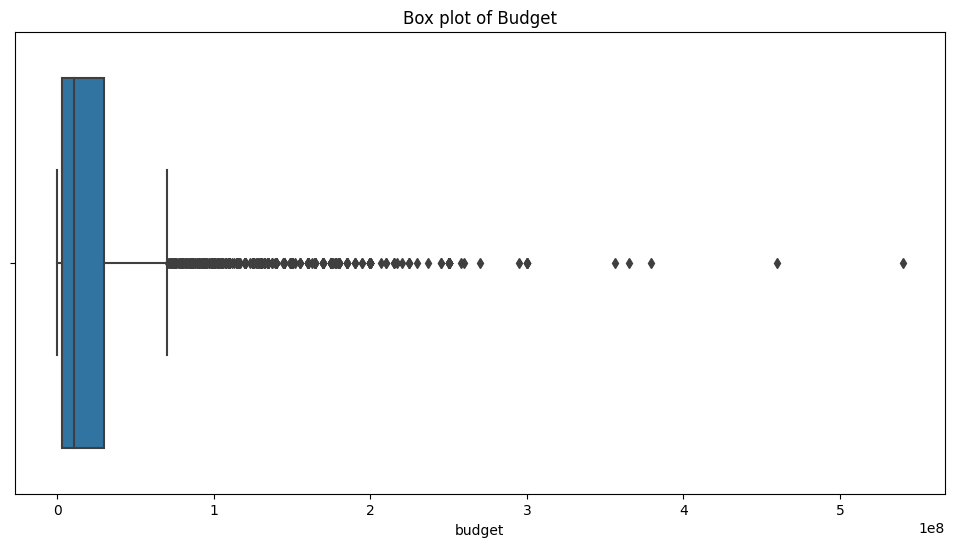

/Users/olgabraginskaya/.pyenv/versions/3.11.4/envs/ml_camp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


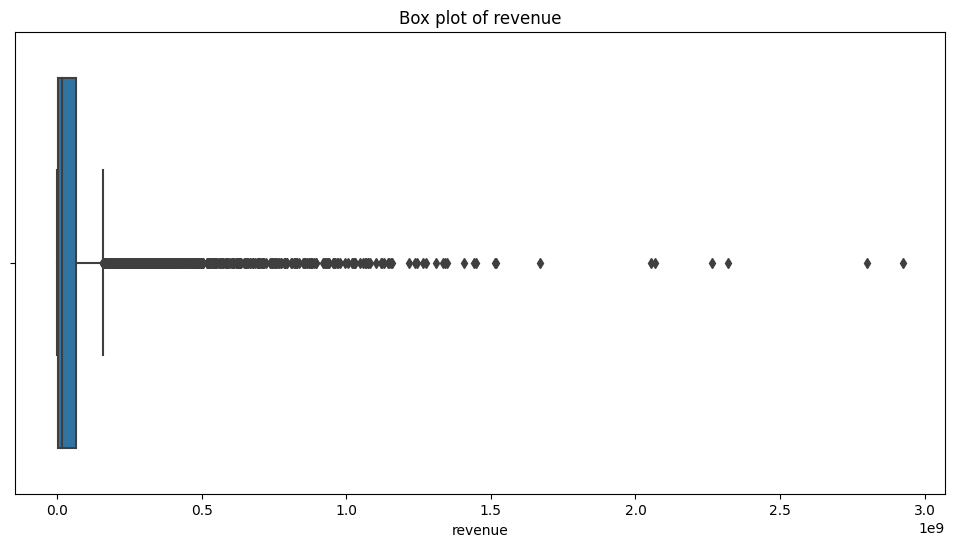

In [1259]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['budget'].dropna())  
plt.title('Box plot of Budget')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['revenue'].dropna())  
plt.title('Box plot of revenue')
plt.show()


In [1260]:
# let's look at 0.01 quantile in budget
quantile_01 = df['budget'].quantile(0.01)
min_value = df['budget'].min()

count_between = df[(df['budget'] < quantile_01) & (df['budget'] >= min_value)].shape[0]

print(f'Number of values between 99th and 100th percentiles: {count_between}')

df[(df['budget'] < quantile_01) & (df['budget'] >= min_value)][['title', "budget", 'release_date']].sort_values(by='budget', ascending=False)


Number of values between 99th and 100th percentiles: 79


,title,budget,release_date
3442,American Adobo,344,2001-09-29
5726,Silk Shoes,300,2006-06-22
6482,The Eylandt Investigation,250,2008-11-06
7735,Let's Try Again,250,1934-07-06
5572,The Thought Exchange,212,2012-06-01
7776,Who Killed Captain Alex?,200,2010-03-01
6794,Black Button,200,2007-01-30
6949,Saved,200,2009-04-11
7575,Oka Laila Kosam,200,2014-10-17
7122,Anonymous Celebrities: Animatic,200,2005-10-18


In [1261]:
# let's look at 0.01 quantile in revenue
quantile_01 = df['revenue'].quantile(0.01)
min_value = df['revenue'].min()

count_between = df[(df['revenue'] < quantile_01) & (df['revenue'] >= min_value)].shape[0]

print(f'Number of values between 0th and 1th percentiles: {count_between}')

df[(df['revenue'] < quantile_01) & (df['revenue'] >= min_value)][['title', "revenue", 'release_date']].sort_values(by='revenue', ascending=False)


Number of values between 0th and 1th percentiles: 80


,title,revenue,release_date
6816,"Doggie Tails, Vol. 1: Lucky's First Sleep-Over",105,2003-01-01
6905,Romance of the Western Chamber,100,1927-09-08
7616,Gopala Gopala,100,2015-01-10
4058,Blade of Fury,100,1993-07-15
727,The Goalie's Anxiety at the Penalty Kick,100,1972-02-19
7575,Oka Laila Kosam,100,2014-10-17
7293,Diau Charn,100,1958-05-28
7287,Yaariyan,100,2014-01-10
7285,Candy Thieves,100,2012-09-08
6992,Old Fish,100,2008-06-12


So you can notice that there are strange little numbers both in revenue and budget. 

So I checked amount of such values for both budget and revenue which is less than 1000$ and due to very little amount I'm going to drop those rows. If I had bigger number I would multiply those numbers by million.

In [1262]:
filtered_df = df[(df['budget'] < 1000) | (df['revenue'] < 1000)]
filtered_df = filtered_df[(filtered_df['budget'] != 0) & (filtered_df['revenue'] != 0)]
print("Total rows where budget or revenue is less than 1000$:", filtered_df.shape)
filtered_df[['title', 'budget', 'revenue']]

Total rows where budget or revenue is less than 1000$: (118, 71)


,title,budget,revenue
34,The Immortals,50,83
58,God Willing,50,80
398,Ben X,1500000,27
498,Love and Happiness,50,60
502,Girls,50,60
508,"Red Nose, Black Heart",100,8000
670,Zyzzyx Road,2000000,30
727,The Goalie's Anxiety at the Penalty Kick,410000,100
940,Walk on Water,1400000,444
1124,MVP: Most Valuable Primate,4,1


I'm going to use historical inflation data to adjust the budget and revenue figures to today's dollars. This would provide a more accurate comparison of the financial success of movies over time. I found historical inflation rates [here](https://www.kaggle.com/datasets/pavankrishnanarne/us-inflation-dataset-1947-present/data). The dataset starts from 1947 so we should filter our movies starting from 1947.

I also found that in the dataset there are equal values for budget and revenue and the most popular number is 500000. Also I googled, for example [Thunderstruck](https://en.wikipedia.org/wiki/Thunderstruck_(2012_film)) and it says Budget 7 million, Box office	587,211 and in our data those both values are 587211. Those rows below don't look good in the dataset and also should be removed

In [1263]:
df[df['budget'] == df['revenue']][['title', 'budget', 'revenue']]

,title,budget,revenue
122,The Deaths of Ian Stone,10000,10000
304,Another Stakeout,30000000,30000000
836,Thunderstruck,587211,587211
995,Narco,823258,823258
2712,Bikini Spring Break,500000,500000
4058,Blade of Fury,100,100
4090,Aegan,500000,500000
4091,Attagasam,500000,500000
4092,Citizen,500000,500000
4093,Dheena,500000,500000


In [1264]:
cpi_data = pd.read_csv('../US_inflation_rates.csv', names=['date', 'CPI'], skiprows=1)  

# Convert the 'date' column to datetime format and extract the year and month
cpi_data['date'] = pd.to_datetime(cpi_data['date'], format='%Y-%m-%d')
cpi_data['year'] = cpi_data['date'].dt.year
cpi_data['month'] = cpi_data['date'].dt.month

# get relase year and release month
df['release_month'] = pd.to_datetime(df['release_date']).dt.month
df['release_year'] = pd.to_datetime(df['release_date']).dt.year

# Merge the datasets on year and month
merged_data = pd.merge(df, cpi_data, left_on=['release_year', 'release_month'], right_on=['year', 'month'], how='left')

# filter movies with budget or revenue  with less than 1000$
merged_data = merged_data[(merged_data['budget'] >= 1000) & (merged_data['revenue'] >= 1000) & (merged_data['budget'] != merged_data['revenue'])]

# Find the most recent year and month in the dataset
max_year = cpi_data['year'].max()
max_month = cpi_data[cpi_data['year'] == max_year]['month'].max()

# Get the CPI value for the target year and month
target_cpi = cpi_data[(cpi_data['year'] == max_year) & (cpi_data['month'] == max_month)]['CPI'].values[0]

# Calculate the adjustment factor
merged_data['adjustment_factor'] = target_cpi / merged_data['CPI']

# Adjust the budget and revenue columns
merged_data['adjusted_budget'] = merged_data['budget'] * merged_data['adjustment_factor']
merged_data['adjusted_revenue'] = merged_data['revenue'] * merged_data['adjustment_factor']
merged_data['adjusted_boxoffice'] = merged_data['BoxOffice'] * merged_data['adjustment_factor']

# Set the float format to display the entire number
pd.options.display.float_format = '{:.2f}'.format

print("amount of rows before 1947 year:", merged_data[merged_data['release_year'] < 1947].shape)
df = merged_data[merged_data['release_year'] >= 1947].drop(['year', 'month', 'date', 'CPI', 'adjustment_factor', 'budget', 'revenue'], axis=1)
df = df.dropna(subset=['adjusted_budget', 'adjusted_revenue']) # ir file is limited to 2023-06-01

amount of rows before 1947 year: (265, 81)


And, finally, let's look at crew and cast columns. We have also 'Director', 'Writer', 'Actors', but let's see first what we can get from the credits dataset.

In [1265]:
print("sample_crew:", df['crew'].iloc[0])
print("sample_cast:", df['cast'].iloc[0])

sample_crew: [{'adult': False, 'credit_id': '52fe459cc3a368484e064ef7', 'department': 'Directing', 'gender': 2, 'id': 102429, 'job': 'Director', 'known_for_department': 'Production', 'name': 'Roger Corman', 'original_name': 'Roger Corman', 'popularity': 7.107, 'profile_path': '/kWvtdBp4AVSOwluWwZ1WhsKlAfk.jpg'}
 {'adult': False, 'credit_id': '52fe459cc3a368484e064efd', 'department': 'Production', 'gender': 2, 'id': 102429, 'job': 'Producer', 'known_for_department': 'Production', 'name': 'Roger Corman', 'original_name': 'Roger Corman', 'popularity': 7.107, 'profile_path': '/kWvtdBp4AVSOwluWwZ1WhsKlAfk.jpg'}
 {'adult': False, 'credit_id': '52fe459bc3a368484e064ea3', 'department': 'Camera', 'gender': 2, 'id': 4083, 'job': 'Director of Photography', 'known_for_department': 'Camera', 'name': 'Floyd Crosby', 'original_name': 'Floyd Crosby', 'popularity': 1.473, 'profile_path': None}
 {'adult': False, 'credit_id': '52fe459bc3a368484e064e8b', 'department': 'Writing', 'gender': 2, 'id': 12415, 

So you can notice that:

* cast: a list of dictionaries consisting of cast names and the corresponding characters they played.
* crew: a list of dictionaries consisting of crew names and the function they performed.

We then simplified the data in the cast and crew columns to focus on key details - keeping only the name and popularity of cast members, and the name, popularity, and job of crew members. This way, our dataset becomes more manageable and ready for analyzing factors that might influence movie success.

In [1266]:
df[df['crew'].notnull() == False][['id', 'title']]

,id,title


In [1267]:
df = df[df['crew'].notnull()]
df = df[df['cast'].notnull()]

def clean_cast_members(members):
    # Retain only 'name' and 'popularity' keys for each member
    return [{'name': member['name'].lower(), 'popularity': member['popularity']} for member in members]

def clean_crew_members(members):
    # Retain only 'name', 'popularity', and 'job' keys for each member
    return [{'name': member['name'].lower(), 'popularity': member['popularity'], 'job': member['job'].lower()} for member in members]

df['cast'] = df['cast'].apply(clean_cast_members)
df['crew'] = df['crew'].apply(clean_crew_members)



In [1268]:
empty_cast = df['cast'].apply(lambda x: len(x) == 0).sum()
empty_crew = df['crew'].apply(lambda x: len(x) == 0).sum()

print("empty cast rows", empty_cast)
print("empty empty_crew rows", empty_crew)

df = df[df['cast'].apply(lambda x: len(x) > 0)]
df = df[df['crew'].apply(lambda x: len(x) > 0)]

empty cast rows 3
empty empty_crew rows 4


Let's make an overview what we are doing with original dataset columns:

| Column | Meaning | Take as a feature? | Why? | 
| :- | :- | :- | :- |
| adult | If the movie is X-Rated or Adult | No | Too many identical values (False), not useful |
| backdrop_path | Path to image | No | Not useful |
| belongs_to_collection | The movie series the particular film belongs to | No | All NULLs |
| genres | The genres associated with the movie | Yes | N/A |
| homepage | Path to the movie homepage | No | Not useful |
| id | TMDB id | No | Needed for joining with credits dataset |
| imdb_id | IMDB id | No | Not useful |
| original_language | The language in which the movie was originally shot | Yes | N/A |
| original_title | The original title of the movie in the native language | No | Not useful |
| overview | Short description of the movie | Yes | N/A |
| poster_path | Path to image | No | Not useful |
| production_companies | List of production companies involved with the making of the movie | Yes | N/A |
| production_countries | List of countries where the movie was shot/produced | Yes | N/A |
| release_date | Release date of the movie | Yes | we will take release_year and release_month |
| runtime | The runtime of the movie in minutes | Yes | N/A |
| spoken_languages | List of spoken languages in the film | Yes | N/A |
| status | Status of the movie | No | We took only Released status |
| tagline | Tagline of the movie | Yes | N/A |
| title | Title of the movie (TMDB) | Yes | N/A |
| video | Indicates if there is a video present of the movie with TMDB | No | Not useful |
| vote_count | Number of votes by users, as counted by TMDB | Yes | N/A |
| Title | Title of the movie (OMDB) | No | Duplicate of 'title' |
| Year | Year of release | No | Duplicate of year in the 'release_date' |
| Rated | MPA film rating | Yes | N/A |
| Released | Release date (OMDB) | No | Duplicate of 'release_date' |
| Runtime | Runtime (OMDB) | No | Duplicate of 'runtime' |
| Genre | Genre (OMDB) | No | Duplicate of 'genres' |
| Director | Director of the movie | No | This info will be obtained from the credits dataset |
| Writer | Writer of the movie | No | This info will be obtained from the credits dataset |
| Actors | List of actors | No | This info will be obtained from the credits dataset |
| Plot | Plot description | Yes | N/A |
| Language | Language (OMDB) | No | Duplicate of 'original_language' |
| Country | Production country (OMDB) | No | Duplicate of 'production_countries' |
| Poster | Path to poster image | No | Not useful |
| imdbVotes | Count of votes on IMDB | Yes | N/A |
| imdbID | IMDB ID | No | Not useful |
| Type | Type of media (movie/series) | No | We filtered only movie type |
| totalSeasons | Total seasons if the media is a series | No | Not relevant |
| Season | Season number if the media is a series | No | All NULLs |
| Episode | Episode number if the media is a series | No | All NULLs |
| seriesID | Series ID if the media is a series | No | All NULLs |
| Error | Error message | No | All NULLs |
| belongs_to_collection.id | Collection ID | No | Not useful |
| belongs_to_collection.name | Name of collection | Yes | Will be replaced by boolean column |
| belongs_to_collection.poster_path | Path to collection poster | No | Not useful |
| belongs_to_collection.backdrop_path | Path to collection backdrop image | No | Not useful |
| DVD | The date when the movie was released on DVD | No | Not useful |
| Website | Link to movie website | No | Not useful |
| BoxOffice | Box office revenue | Yes | N/A |
| Production | Production company | No | We have 'production_companies' column |
| Response | Response message | No | Not relevant |
| Ratings | List of ratings in different systems - Metacritic (in Metascore), Rotten Tomatoes, IMDB (in imdbRating) | Yes | Only Rotten Tomatoes |
| Metascore | Metacritic rating | Yes | N/A |
| imdbRating | IMDB rating | Yes | N/A |
| vote_average | Average rating of the movie by TMDB | Yes | N/A |
| popularity | Popularity Score assigned by TMDB | Yes | N/A |
| budget | The budget of the movie in dollars, adjusted with inflation rate | Yes | N/A |
| revenue | The total revenue of the movie in dollars, adjusted with inflation rate | Yes | N/A |
| Awards | Awards won/nominated | Yes | N/A |


In [1269]:

dataset_df = df[['title', 'release_year', 'release_month', "original_language" , 'spoken_languages', 'genres',
                       'production_companies',  'production_countries', 'runtime', 'Rated', 'tagline', 'overview', 'Plot',
                         'popularity', 'vote_average', 'vote_count', 'cast', 'crew', 'belongs_to_collection.name',
                       'oscar_won', 'oscar_nominated', 'bafta_won', 'bafta_nominated', 'awards_won', 'awards_nominated',
                      'Rotten Tomatoes', 'Metascore', 'imdbRating', 'imdbVotes', 'adjusted_budget', 'adjusted_revenue', 'adjusted_boxoffice']].copy()
# Standardize column names
dataset_df.columns = dataset_df.columns.str.lower().str.replace(' ', '_')


dataset_df.rename(columns={"popularity": "tmdb_popularity", "vote_average": "tmdb_rating",
                     "vote_count": "tmdb_vote_count", 'metascore': 'metacritic_rating',
                     "imdbrating": "imdb_rating", 'imdbvotes': 'imdb_votes', "rotten_tomatoes": "rotten_tomatoes_rating"}, inplace=True)

# lower all values in categorical columns
categorical_vars = list(dataset_df.dtypes[dataset_df.dtypes == 'object'].index)
categorical_vars.remove('crew')
categorical_vars.remove('cast')
for c in categorical_vars:
    dataset_df[c] = dataset_df[c].str.lower()

pd.set_option('display.max_columns', None)
dataset_df.head(2)


,title,release_year,release_month,original_language,spoken_languages,genres,production_companies,production_countries,runtime,rated,tagline,overview,plot,tmdb_popularity,tmdb_rating,tmdb_vote_count,cast,crew,belongs_to_collection.name,oscar_won,oscar_nominated,bafta_won,bafta_nominated,awards_won,awards_nominated,rotten_tomatoes_rating,metacritic_rating,imdb_rating,imdb_votes,adjusted_budget,adjusted_revenue,adjusted_boxoffice
0,the pit and the pendulum,1961,8,en,en,"horror,mystery","alta vista productions,american international ...",us,81,unrated,betrayal cuts both ways!,"in the sixteenth century, francis barnard trav...","in the sixteenth century, francis barnard trav...",9.49,68.25,288,"[{'name': 'vincent price', 'popularity': 15.23...","[{'name': 'roger corman', 'popularity': 7.107,...",None,0,0,0,0,0,0,88.00,78.00,70.00,15801.00,2029666.00,20296659.99,NaN
1,universal soldier: regeneration,2009,10,en,"bg,en","adventure,action,science fiction,thriller","foresight unlimited,signature entertainment,ba...",us,97,r,reanimated. rearmed. the ultimate rematch,when terrorists threaten nuclear catastrophe a...,terrorists kidnap the russian prime minister's...,15.84,55.98,405,"[{'name': 'jean-claude van damme', 'popularity...","[{'name': 'mark damon', 'popularity': 3.125, '...",universal soldier collection,0,0,0,0,0,0,NaN,70.00,53.00,26273.00,19647100.12,1228485.46,NaN


In [1270]:
dataset_df.to_parquet('../data/cleaned/movies_dataset.parquet', compression='gzip')

In [1271]:
dataset_df.shape

(7485, 32)